In [12]:
import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import ggplot, aes, geom_point, geom_smooth, labs
import statsmodels.formula.api as smf

In [13]:
np.random.seed(42)

In [14]:
def generate_data(y, n, xmin, xmax, sigma):
    x = pd.Series(np.random.uniform(xmin, xmax, n))
    epsilon = pd.Series(np.random.normal() for i in range(len(x)))
    y = pd.Series(eval(y) + epsilon * sigma)
    df = pd.DataFrame({"y": y, "x": x})
    return df

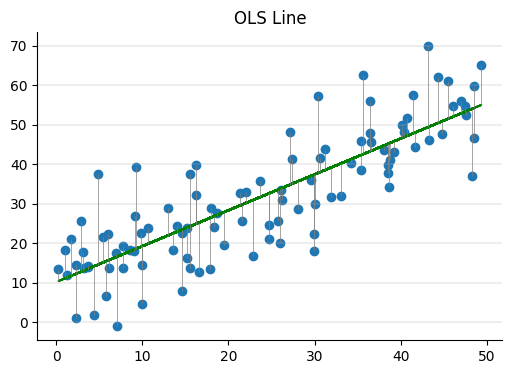

In [15]:
# is the relationship between your variables linear?
# Lets start with a good plot
# look at a plot, bc summary stats can be deceiving

df = generate_data(y="x+8", n=100, xmin=0, xmax=50, sigma=10)


def display_data(df):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(df["x"], df["y"])
    m1 = smf.ols("y ~x", data=df).fit()
    b0, b1 = m1.params
    ax.plot(df["x"], (b0 + b1 * df["x"]), color="green")
    ax.set_title("OLS Line")
    # FEATURE: toggle to show resid

    ax.vlines(df["x"], m1.predict(), df["y"], color="gray", linewidth=0.5)
    for x in ["top", "right"]:
        ax.spines[x].set_visible(False)
    plt.grid(axis="y", linewidth=".3")

    plt.show()


display_data(df)

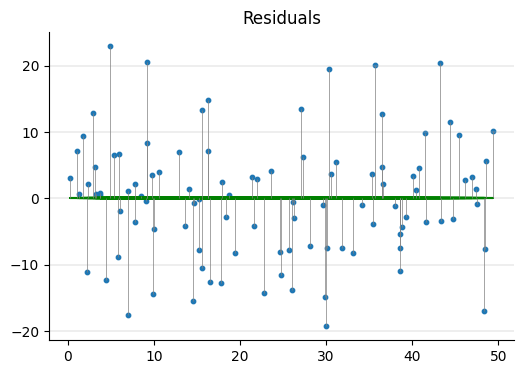

In [16]:
def display_resid(df):
    m1 = smf.ols("y ~x", data=df).fit()
    resid = m1.resid
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(df["x"], resid, s=10)
    ax.plot(df["x"], [0] * len(df), color="green")
    ax.set_title("Residuals")
    for x in ["top", "right"]:
        ax.spines[x].set_visible(False)
    plt.grid(axis="y", linewidth=".3")
    ax.vlines(df["x"], 0, resid, color="gray", linewidth=0.5)
    # notice how residuals are evenly distributed around O
    # This is a good thing

    plt.show()


display_resid(df)

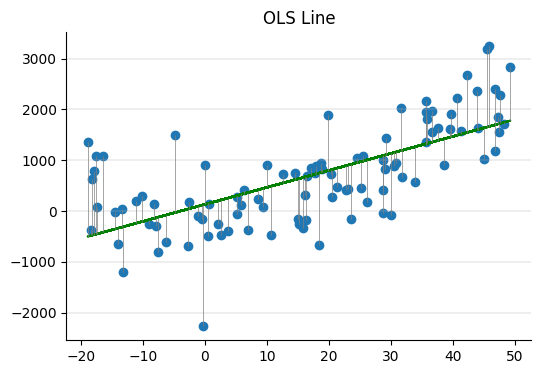

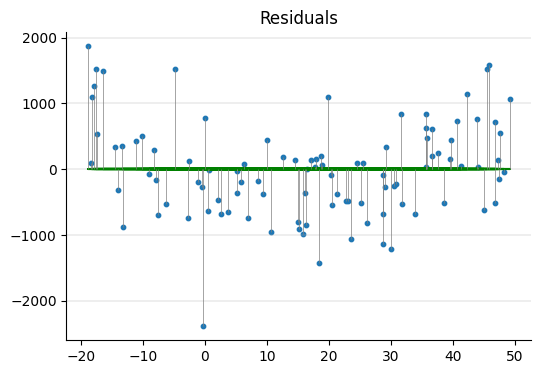

In [17]:
df = generate_data(y="x**2", n=100, xmin=-20, xmax=50, sigma=700)
display_data(df)
display_resid(df)

#### What problem does this residual chart show us?
**Look at the residuals around x = -15 - all our residuals are so much higher than we predicted.**

**then from around x = 0 to x=30 our values are all below what we predicted**

**in summary, there is a clear pattern in our residuals: something that our model is failing to explain**